<a href="https://colab.research.google.com/github/SJKIM2253/Statistics_with_Python/blob/master/190719_KNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz

from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV   # cross validation(구버전)

In [38]:
df_raw=pd.read_csv("/content/drive/My Drive/BigDataAnalysis/DIABETES.csv", engine="python")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [0]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1)

In [41]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw, df_raw_y, test_size = 0.3, random_state =8) 
print("train data X size: {}".format(df_train_x.shape))
print("test data X size: {}".format(df_test_x.shape))

train data X size: (309, 11)
test data X size: (133, 11)


In [42]:
knn_uncustomized = KNR()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Scoring on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.994
Scoring on test set: 0.991


In [24]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
train_score=[]; test_score=[]

para_n_neighbors = [ i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNR(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_knn = pd.DataFrame()
df_score_knn["Neighbors"] = para_n_neighbors
df_score_knn["TrainScore"]=train_score
df_score_knn["TestScore"]=test_score

df_score_knn.round(3)    

,Neighbors,TrainScore,TestScore
0,1,1.000,0.980
1,2,0.995,0.987
2,3,0.994,0.990
3,4,0.994,0.991
4,5,0.994,0.991
5,6,0.994,0.992
6,7,0.993,0.992
7,8,0.993,0.991
8,9,0.993,0.990
9,10,0.993,0.989


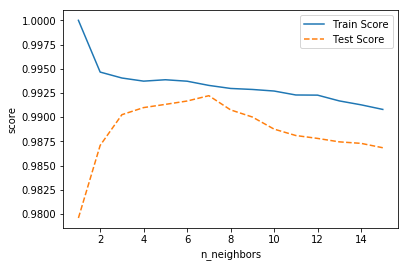

In [26]:
plt.plot(para_n_neighbors, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_neighbors, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()

In [0]:
train_score=[]; test_score=[]

para_n_neighbors = [ i for i in range(1,11)] * 2

para_weights = (["uniform"]*10) + (["distance"]*10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn=KNR(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_weight = pd.DataFrame()
df_score_weight["Neighbors"] = para_n_neighbors
df_score_weight["Weights"] = para_weights
df_score_weight["TrainScore"]=train_score
df_score_weight["TestScore"]=test_score

In [28]:
df_score_weight_pivot = df_score_weight.pivot(index = "Neighbors", columns = "Weights", values=["TrainScore","TestScore"])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.979583  0.979583
2                1.0  0.994657  0.987195  0.987083
3                1.0  0.994043  0.990678  0.990255
4                1.0  0.993720  0.991472  0.990988
5                1.0  0.993864  0.991827  0.991319

In [29]:
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 + "_" + level1
df_score_weight_pivot.head()


,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,0.979583,0.979583
2,1.0,0.994657,0.987195,0.987083
3,1.0,0.994043,0.990678,0.990255
4,1.0,0.993720,0.991472,0.990988
5,1.0,0.993864,0.991827,0.991319


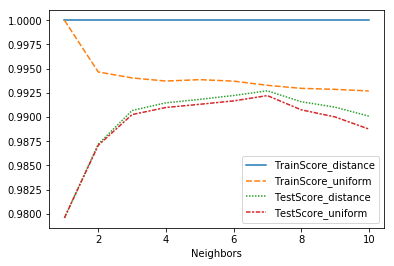

In [30]:
sns.lineplot(data = df_score_weight_pivot)

In [0]:
train_score=[]; test_score=[]

para_n_neighbors = [ i for i in range(1,11)] * 3

para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNR( n_neighbors = v_n_neighbors, weights = 'uniform', metric = v_metric)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_metric = pd.DataFrame()
df_score_metric["Neighbors"] = para_n_neighbors
df_score_metric["Metric"] = para_metric
df_score_metric["TrainScore"]=train_score
df_score_metric["TestScore"]=test_score

In [32]:
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,0.980
1,2,minkowski,0.995,0.987
2,3,minkowski,0.994,0.990
3,4,minkowski,0.994,0.991
4,5,minkowski,0.994,0.991
5,6,minkowski,0.994,0.992
6,7,minkowski,0.993,0.992
7,8,minkowski,0.993,0.991
8,9,minkowski,0.993,0.990
9,10,minkowski,0.993,0.989


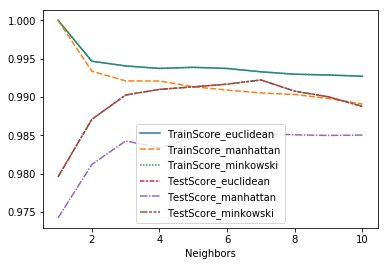

In [33]:
df_score_metric_pivot = df_score_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainScore","TestScore"])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data= df_score_metric_pivot)

In [36]:
knn_final = KNR(n_neighbors = 7, weights = "uniform", metric = "euclidean")
knn_final.fit(df_train_x,df_train_y)

print("Scoring on training set: {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.993
Scoring on test set: 0.992


In [35]:
estimator = KNR()

param_grid = {"n_neighbors":para_n_neighbors, "weights":para_weights, "metric":para_metric}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)
print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')

best parameter:
{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

best score:
0.988


6개의 모델 중 KNN이 가장 연속형에 부적합함

연속형에서

다중회귀분석
Decision Tree
Random Forest
Gradient Boosting
SVM
KNN


[Parameter]
유의한 변수 선택
leaf, split, depth
estimate, leaf, split, depth
learning rate, estimate, leaf, split, depth
C, gamma, epsilon,
K, weight, metric

[고려사항]
다중회귀분석 - 다중공선성, 잔차
SVM - scailng

[Random state]
x
x
o
o
x
x

분류형에서
다중회귀분석 > 로지스틱회귀분석
Decsion Tree 분리기준 : Gini, entrophy
SVM에서 epsilon만 빠짐

# 회귀식의 장점 : 식이 보인다, 최적화가 가능하다[다중회귀분석, 로지스틱회귀분석]
